rešitev domače naloge 'ptice' in zanka while

poševni met

$t$ - čas od začetka meta

$v_0$ - začetna hitrost, izberemo med 0 in 40 m/s

$\varphi$ - kot izberemo v razponu med 1 in 90 stopinj

$g = 9.8 m/s^2$ - gravitacijski pospešek

$v_x = v_0 \cdot \cos\varphi$ - hitrost v vodoravni smeri 

$v_y = v_0 \cdot \sin\varphi - g\cdot t$ - hitrost v navpični smeri 

$x = v_x \cdot t$ - vodoravni premik v času $t$

$y = v_y \cdot t - \dfrac{g \cdot t^2}{2}$ - navpični premik v času $t$

$h = \dfrac{v_0^2\cdot\sin^2\varphi}{2 g} $ - največja višina

$D = \dfrac{v_0^2\cdot\sin2\varphi}{g}$ - maksimalna razdalja v vodoravni smeri

$t_{skupni} = 2 \cdot \dfrac{v_0 \cdot \sin\varphi}{g}$ - čas leta

In [3]:
# %matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    return line,

def animiraj(x, y, cilj):
    fig, ax = plt.subplots(figsize = (8,4))

    max_x = max(x)
    if max_x < cilj:
        max_x = cilj
    ax.set_xlim(0, max_x*1.2)
    ax.set_ylim(0, max_x*0.6)
    ax.scatter(cilj, 0, c='orange', s=[60])
    line, = ax.plot(x, y)

    return animation.FuncAnimation(fig, update, len(x), interval=30, 
                                   fargs=[x, y, line], blit=True, repeat=False)



#### analitična rešitev

In [33]:
from math import sin, cos, radians
import tabulate
from IPython.display import HTML, display

v_0 = 50  # m/s
phi = radians(48)   # stopinj

g = 9.8  # m/s**2
g_sonce = 274.3

cilj = 250 # m

sez_x = []
sez_y = [] 
yy = []

for i in range(100):
    t = i / 10  # računamo s korakom na desetinko sekunde
    x = v_0 * cos(phi) * t
    y = v_0 * sin(phi) * t - (g * t**2) / 2
    sez_x.append(x)
    sez_y.append(y)
    yy.append([t, y])
    if y < 0:   #ne mečemo v luknjo
        break
    
#ani = animiraj(sez_x, sez_y, cilj)

        
print(f'čas leta: {2 * v_0 * sin(phi) / g:.2f}s')
print(f'domet: {v_0**2 * sin(2*phi)/g:.2f}m')
print(f'največja višina: {v_0**2 * sin(phi)**2/(2*g):.2f}m')

#print(tabulate.tabulate([[el] for el in sez_y]))
#print(tabulate.tabulate(yy, tablefmt="html"))
display(HTML(tabulate.tabulate(yy, tablefmt="html", headers=['t','h'], floatfmt=('.1f', '.3f'))))

čas leta: 7.58s
domet: 253.70m
največja višina: 70.44m


t,h
0.0,0.000
0.1,3.667
0.2,7.235
0.3,10.706
0.4,14.079
0.5,17.354
0.6,20.530
0.7,23.609
0.8,26.590
0.9,29.473


#### numerična rešitev

In [63]:
v_0 = 50  # m/s
phi = radians(48)   # stopinj

g = 9.8  # m/s**2
g_sonce = 274.3

cilj = 250 # m

#začetna pozicija
x = 0
y = 0

#vodoravna in navpična komponenta hitrosti
v_x = v_0 * cos(phi)
v_y = v_0 * sin(phi)

delta_t = 0.1  # računamo s korakom na desetinko sekunde (napaka velika, probaj še 0.01)

sez_x_num = [x]
sez_y_num = [y] 

for i in range(1000):
    
    #izračunamo premik pozicije vodoravno in navpično
    delta_x = v_x  * delta_t
    delta_y = v_y  * delta_t
        
    #izračunamo novo pozicijo izstrelka
    x += delta_x
    y += delta_y
    
    #izračunamo obe komponenti hitrosti v novi poziciji
    # v_x se ne spreminja skozi čas
    v_y = v_y - g * delta_t
    
    #shranimo pozicijo
    sez_x_num.append(x)
    sez_y_num.append(y)

    if y < -1:  #ne mečemo v luknjo
        break
    
#ani = animiraj(sez_x_num, sez_y_num, cilj)


#### dodaj zračni upor

In [47]:
from math import sin, cos, sqrt, atan

v_0 = 50  # m/s
phi = radians(48)   # stopinj

g = 9.8  # m/s**2
g_sonce = 274.3

cilj = 250 # m

#začetna pozicija
x = 0
y = 0

#vodoravna in navpična komponenta hitrosti
v_x = v_0 * cos(phi)
v_y = v_0 * sin(phi)

k = 0.005 #konstanta, ki določa upor telesa (odvisna od velikosti in oblike telesa)

delta_t = 0.01  # računamo s korakom na desetinko sekunde

sez_x_zrak = [x]
sez_y_zrak = [y] 

for i in range(1000):
    
    #izračunamo premik pozicije vodoravno in navpično
    delta_x = v_x  * delta_t
    delta_y = v_y  * delta_t
        
    #izračunamo novo pozicijo izstrelka
    x += delta_x
    y += delta_y
    
    #izračunamo pospešek/pojemek v vodoravni in navpični smeri
    v = sqrt(v_x**2+v_y**2)
    phi = atan(v_y/v_x)
    a_x = k * v**2 * cos(phi)
    a_y = k * v**2 * sin(phi) + g
    
    #izračunamo obe komponenti hitrosti v novi poziciji
    v_x = v_x - a_x * delta_t
    v_y = v_y - a_y * delta_t
    
    #shranimo pozicijo
    sez_x_zrak.append(x)
    sez_y_zrak.append(y)

    if y < -1:    #ne mečemo v luknjo
        break

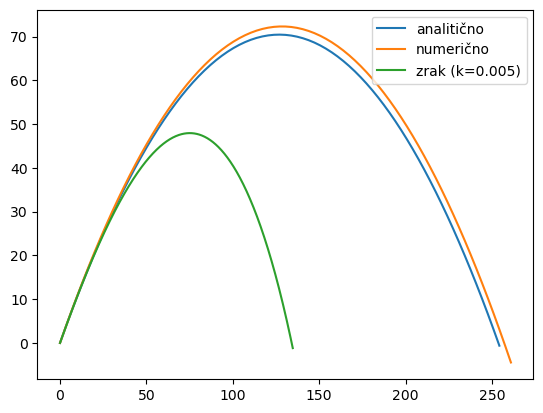

In [65]:
#import matplotlib.pyplot as plt  
plt.plot(sez_x, sez_y, label='analitično')
plt.plot(sez_x_num, sez_y_num, label='numerično')
plt.plot(sez_x_zrak, sez_y_zrak, label='zrak (k=0.005)')
plt.legend()

domača naloga, naredite primerjavo obeh rešitev (povprečni pogrešek...)

domača naloga epidemija, naslednjič razlaga